In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

df = pd.read_csv('../data/processed/f1_race_strategy_data.csv')

In [5]:
F1_COLORS = {
    'primary':    '#FF1E1E',        # Ferrari Red
    'secondary':  '#0066CC',        # Red Bull Blue
    'accent':     '#FF8700',        # McLaren Orange
    'dark':       '#0F1419',        # Racing Night
    'light':      '#FFFFFF',        # Pure White
    'silver':     '#C0C0C0',        # Mercedes Silver
    'neon_green': '#00FF41',        # Matrix Green
    'neon_blue':  '#00D4FF',        # Electric Blue
    'gold':       '#FFD700',        # Championship Gold
    'purple':     '#8A2BE2',        # Purple Sector
    'grid':       '#2A2A2A'         # Grid Lines
}

TEAM_COLORS = {
    'Red Bull Racing': '#0066CC',
    'Ferrari':         '#DC143C',
    'Mercedes':        '#00D2BE',
    'McLaren':         '#FF8700',
    'Alpine F1 Team':  '#0082FA',
    'Aston Martin':    '#006F62',
    'Williams':        '#005AFF',
    'AlphaTauri':      '#2B4562',
    'Alfa Romeo':      '#900000',
    'Haas F1 Team':    '#787878',
    'Kick Sauber':     '#52C832'
}

STRATEGY_COLORS = {
    'One-Stop':   F1_COLORS['neon_green'],
    'Two-Stop':   F1_COLORS['primary'],
    'Multi-Stop': F1_COLORS['accent'],
    'No-Stop':    F1_COLORS['gold'],
    'Unknown':    F1_COLORS['silver']
}

plt.style.use('dark_background')
sns.set_palette([F1_COLORS['primary'], F1_COLORS['secondary'], F1_COLORS['accent'],
                F1_COLORS['neon_green'], F1_COLORS['gold'], F1_COLORS['purple']])

plt.rcParams.update({
    'figure.figsize':   (16, 9),
    'figure.facecolor': F1_COLORS['dark'],
    'axes.facecolor':   F1_COLORS['dark'],
    'axes.edgecolor':   F1_COLORS['light'],
    'axes.labelcolor':  F1_COLORS['light'],
    'axes.titlesize':   22,
    'axes.labelsize':   14,
    'xtick.color':      F1_COLORS['light'],
    'ytick.color':      F1_COLORS['light'],
    'ytick.labelsize':  12,
    'xtick.labelsize':  12,
    'grid.color':       F1_COLORS['grid'],
    'grid.alpha':       0.3,
    'text.color':       F1_COLORS['light'],
    'font.family':      'DejaVu Sans',
    'font.weight':      'normal'
})

f1_plotly_template = {
    'layout': {
        'paper_bgcolor':  F1_COLORS['dark'],
        'plot_bgcolor':   F1_COLORS['dark'],
        'font': {'color': F1_COLORS['light'], 'family': 'Arial', 'size': 14},
        'title': {
            'font':    {'size': 24, 'color': F1_COLORS['light']},
            'x':       0.5,
            'xanchor': 'center'
        },
        'xaxis': {
            'gridcolor':     F1_COLORS['grid'],
            'gridwidth':     1,
            'linecolor':     F1_COLORS['light'],
            'tickcolor':     F1_COLORS['light'],
            'zerolinecolor': F1_COLORS['grid']
        },
        'yaxis': {
            'gridcolor':     F1_COLORS['grid'],
            'gridwidth':     1,
            'linecolor':     F1_COLORS['light'],
            'tickcolor':     F1_COLORS['light'],
            'zerolinecolor': F1_COLORS['grid']
        },
        'colorway': [F1_COLORS['primary'], F1_COLORS['secondary'], F1_COLORS['accent'],
                     F1_COLORS['neon_green'], F1_COLORS['gold'], F1_COLORS['purple']],
        'hovermode': 'closest'
    }
}

pio.templates['f1_dark'] = f1_plotly_template
pio.templates.default = 'f1_dark'

In [6]:
def style_matplotlib_plot(ax, title, xlabel = '', ylabel = ''):
    """Apply F1 styling to matplotlib plots"""
    ax.set_title(title, fontsize = 22, fontweight = 'bold', color = F1_COLORS['light'], pad = 20)
    ax.set_xlabel(xlabel, fontsize = 14, color = F1_COLORS['light'])
    ax.set_ylabel(ylabel, fontsize = 14, color = F1_COLORS['light'])

    ax.grid(True, alpha = 0.3, color = F1_COLORS['grid'], linewidth = 0.8)
    ax.set_facecolor(F1_COLORS['dark'])

    for spine in ax.spines.values():
        spine.set_color(F1_COLORS['light'])
        spine.set_linewidth(1.2)

    ax.tick_params(colors = F1_COLORS['light'], labelsize = 12)
    return ax

def add_f1_watermark(fig, text = '🏁 F1 Strategy Analysis'):
    """Add F1 branding plotly figures"""
    fig.add_annotation(
        text = text,
        xref = 'paper', yref = 'paper',
        x = 0.02, y = 0.98,
        showarrow = False,
        font = dict(size = 11, color = F1_COLORS['neon_green']),
        bgcolor = F1_COLORS['dark'],
        bordercolor = F1_COLORS['neon_green'],
        borderwidth = 1,
        borderpad = 4
    )
    return fig

def get_team_color(team_name):
    """Get team color or default"""
    return TEAM_COLORS.get(team_name, F1_COLORS['silver'])

def get_strategy_color(strategy):
    """Get strategy color or default"""
    return STRATEGY_COLORS.get(strategy, F1_COLORS['silver'])

def create_color_gradient(color1, color2, n_colors = 10):
    """Create color gradient between two colors"""
    from matplotlib.colors import LinearSegmentedColormap
    colors = [color1, color2]
    cmap   = LinearSegmentedColormap.from_list('custom', colors, N = n_colors)
    return [cmap(i) for i in np.linspace(0, 1, n_colors)]

In [7]:
print("🏁 F1 STRATEGY VISUALIZATION")
print("=" * 50)
print(f"📊 Dataset: {df.shape[0]:,} races × {df.shape[1]} features")
print(f"📅 Years: {df['year'].min()} - {df['year'].max()}")
print(f"🏎️ Teams: {df['team_name'].nunique() if 'team_name' in df.columns else 'N/A'}")
print(f"🏁 Circuits: {df['circuit_short_name'].nunique() if 'circuit_short_name' in df.columns else 'N/A'}")

print("\n🎯 Key Strategy Metrics:")
key_metrics = ['strategy_type', 'pit_stops', 'tyre_strategy', 'avg_lap_time', 'position']
for metric in key_metrics:
    if metric in df.columns:
        non_null = df[metric].notna().sum()
        completeness = (non_null / len(df)) * 100
        print(f"    {metric}: {completeness:.1f}% complete ({non_null:,}/{len(df):,}))")

if 'strategy_type' in df.columns:
    print(f"\n🔧 Strategy Distribution:")
    strategy_dist = df['strategy_type'].value_counts()
    for strategy, count in strategy_dist.items():
        pct = (count / len(df)) * 100
        print(f"    {strategy}: {count:,} ({pct:.1f}%")

print(f"\n✅ Design system loaded - {len(F1_COLORS)} colors, {len(TEAM_COLORS)} teams")
print(f"🎨 Ready for visualization!")

df.head()

🏁 F1 STRATEGY VISUALIZATION
📊 Dataset: 1,556 races × 73 features
📅 Years: 2023 - 2025
🏎️ Teams: 13
🏁 Circuits: 24

🎯 Key Strategy Metrics:
    strategy_type: 100.0% complete (1,556/1,556))
    pit_stops: 100.0% complete (1,556/1,556))
    tyre_strategy: 99.8% complete (1,553/1,556))
    avg_lap_time: 97.2% complete (1,512/1,556))
    position: 90.0% complete (1,400/1,556))

🔧 Strategy Distribution:
    Two-Stop: 538 (34.6%
    One-Stop: 489 (31.4%
    No-Stop: 276 (17.7%
    Multi-Stop: 250 (16.1%
    Unknown: 3 (0.2%

✅ Design system loaded - 11 colors, 11 teams
🎨 Ready for visualization!


,dnf,dns,driver_number,dsq,duration,gap_to_leader,meeting_key_x,laps_completed,points,position,...,has_red_flag,has_penalty,has_investigation,finished_points,had_fastest_lap,strategy_type,race_disrupted,grid_category,points_per_position,undercut_window
0,False,False,1,False,5636.736,0,1141,57.0,25.0,1.0,...,True,True,True,True,False,Two-Stop,True,NaN,25.0,False
1,False,False,11,False,5648.723,11.987,1141,57.0,18.0,2.0,...,True,True,True,True,False,Two-Stop,True,NaN,9.0,False
2,False,False,14,False,5675.373,38.637,1141,57.0,15.0,3.0,...,True,True,True,True,False,Two-Stop,True,NaN,5.0,False
3,False,False,55,False,5684.788,48.052,1141,57.0,12.0,4.0,...,True,True,True,True,False,Two-Stop,True,NaN,3.0,False
4,False,False,44,False,5687.713,50.977,1141,57.0,10.0,5.0,...,True,True,True,True,False,Two-Stop,True,NaN,2.0,False


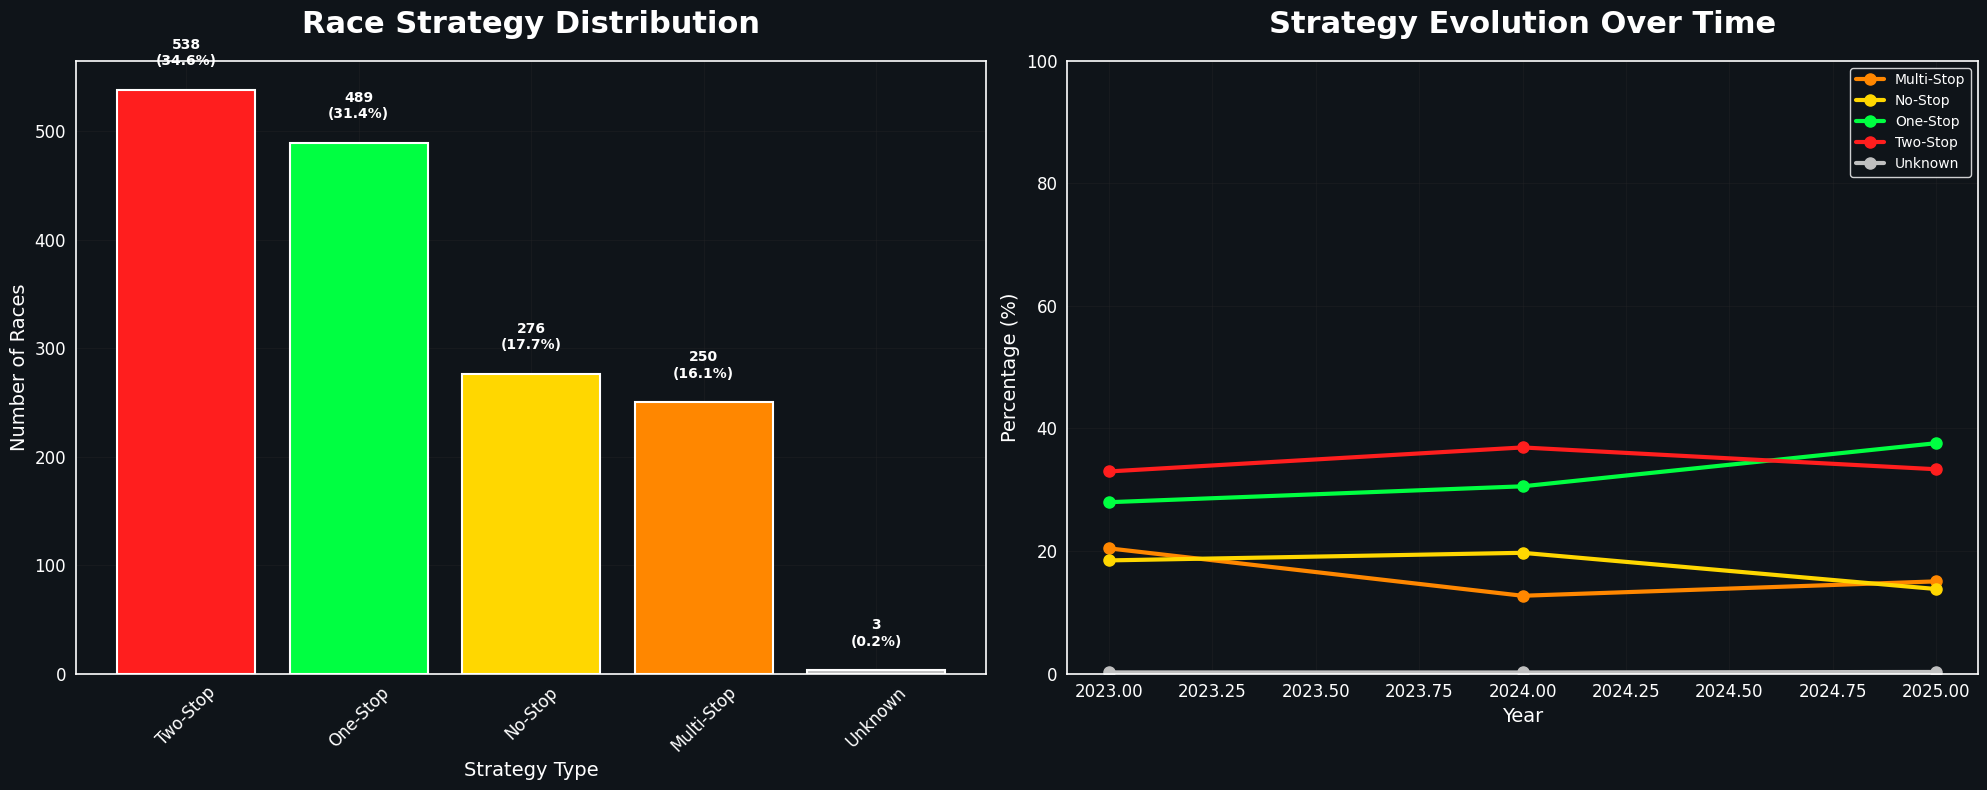

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))

strategy_counts = df['strategy_type'].value_counts()
colors = [get_strategy_color(strategy) for strategy in strategy_counts.index]

bars1 = ax1.bar(strategy_counts.index, strategy_counts.values, color = colors,
                edgecolor = F1_COLORS['light'], linewidth = 1.5)
style_matplotlib_plot(ax1, 'Race Strategy Distribution', 'Strategy Type', 'Number of Races')

for i, (strategy, count) in enumerate(strategy_counts.items()):
    percentage = (count / strategy_counts.sum()) * 100
    ax1.text(i, count + 20, f'{count}\n({percentage:.1f}%)',
             ha = 'center', va = 'bottom', color = F1_COLORS['light'], fontweight = 'bold')

ax1.tick_params(axis = 'x', rotation = 45)

strategy_by_year = df.groupby(['year', 'strategy_type']).size().unstack(fill_value = 0)
strategy_by_year_pct = strategy_by_year.div(strategy_by_year.sum(axis = 1), axis = 0) * 100

for strategy in strategy_by_year_pct.columns:
    ax2.plot(strategy_by_year_pct.index, strategy_by_year_pct[strategy],
             marker = 'o', linewidth = 3, markersize = 8,
             color = get_strategy_color(strategy), label = strategy)

style_matplotlib_plot(ax2, 'Strategy Evolution Over Time', 'Year', 'Percentage (%)')
ax2.legend(frameon = True, facecolor = F1_COLORS['dark'], edgecolor = F1_COLORS['light'])
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()